In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from imblearn.over_sampling import SMOTE

sns.set_style("whitegrid")



In [3]:
df = pd.read_csv('/Users/jaiveersinghkhanuja/Desktop/credit_card_detection_project/creditcard.csv')

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (227845, 30)
Test shape: (56962, 30)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)


Scaled training shape: (227845, 30)


In [6]:
# Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100, contamination=0.0017, random_state=42
)
iso_forest.fit(X_train_scaled)
y_pred_iso = iso_forest.predict(X_test_scaled)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# One-Class SVM
X_train_normal = X_train_scaled[y_train == 0]
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.0017)
ocsvm.fit(X_train_normal)
y_pred_svm = ocsvm.predict(X_test_scaled)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)



In [7]:
y_pred_iso = iso_forest.predict(X_test_scaled)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)


=== Isolation Forest Results ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962



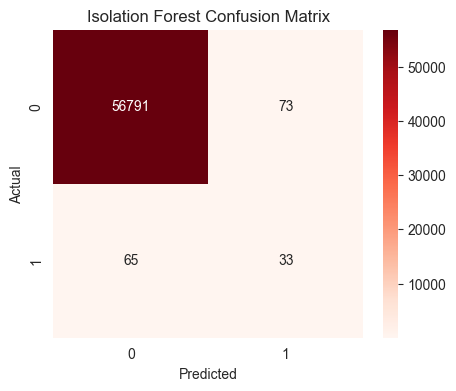

In [8]:
print("=== Isolation Forest Results ===")
print(classification_report(y_test, y_pred_iso))

cm_iso = confusion_matrix(y_test, y_pred_iso)

plt.figure(figsize=(5,4))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Reds')
plt.title("Isolation Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [9]:
X_train_normal = X_train_scaled[y_train == 0]

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='auto',
    nu=0.0017  # expected fraud proportion
)

ocsvm.fit(X_train_normal)


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'auto'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"nu nu: float, default=0.5An upper bound on the fraction of trainingerrors and a lower bound of the fraction of supportvectors. Should be in the interval (0, 1]. By default 0.5will be taken.",0.0017
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1
